# Data visualization

It is important to emphasize a distinction between two very different concepts that people both describing using the umbrella term “visualization”. The first of these is “visualization for data exploration”: using visualization to understand (that is, to undrstand yourself) a collection of data for the purposes of further analysis. In a short phrase, this type of visualization has the goal of you “finding what is true” within the data. The alternative is “visualization for presentation”: distilling some aspect of the data into an easily-understandable figure or chart that conveys to a broad audience some very particular aspect of the data that you want to convey. This type of visualization is about “convincing other people your finding is true”.

## Visualization vs. statistics

Visualization almost always presents a more informative (though less quantitative) 
view of your data than statistics (the noun, not the field)

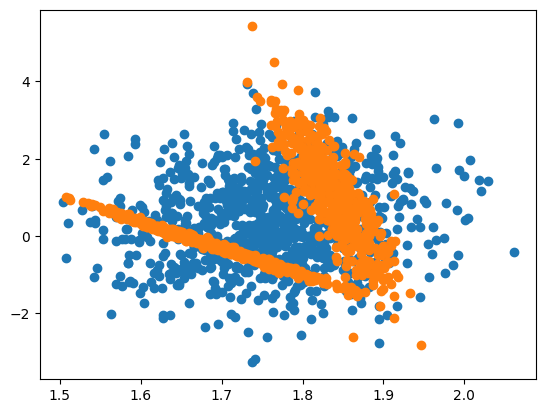

In [1]:
# this code creates two randoms distributions and scales them to have the same mean and covariance

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

np.random.seed(0)
x = np.random.randn(2) + np.random.randn(1000,2) @ np.random.randn(2,2)
y = np.concatenate([np.random.randn(500,2) @ np.random.randn(2,2), 
                    [4,4]+np.random.randn(500,2) @ np.random.randn(2,2)])

A = la.sqrtm(np.cov(x.T))
B = la.sqrtm(np.cov(y.T))
y = ((y - np.mean(y,0)) @ np.linalg.inv(B) @ A) + np.mean(x,0)
plt.scatter(*x.T)
plt.scatter(*y.T)

## Types of data

The four basic types of data are:

- **Nominal data:** categorical data with no inherent ordering between the categories. For example, a “pet type” variable could consist of the classes {dog, cat, rabbit}, and there is no relative ordering between  these two types, they are just different discrete values.

- **Ordinal data:** categorical data with an inherent ordering, but where the “differences” between categories has no strictly numerical meaning. The canonical example here are survey responses with responses such as: {strong disagree, slightly disagree, neutral, slightly agree, strongly agree}. The important character here is that although there is a clear ordering between these types, there is no sense in which the difference between slightly agree and strongly agree is the “same” as the difference between neutral and slightly agree.

- **Interval data:** numeric data, that is, data that can be mapped to a “number line”; the important aspect in contrast with ordinal data, though, is not the “discrete versus continuous differentiation (integer values can be considered interval data, for instance), but the fact that relative differences in interval data have meaning. A classical example is temperature (in Fahrenheit or Celsius, a point which we will emphasize more shortly): here the differences between temperatures have a meaning: 10 and 15 degrees are separated by the same amount as 15 and 20 (this property is so inherent to numerical data that it almost seems strange to emphasize it). On the other hand, interval data encompasses instances where the zero point has “no real meaning”; what this means in practice is that the ratio between two data points has no meaning. Twenty degrees Farenheit is not “twice as hot” in any meaningful sense than 10 degrees; and certainly not infinitely hotter than zero degrees.

- **Ratio data:** also numeric data, but where the ratio between measurements does have some meaning. The classical example here is temperature Kelvin. Obviously just like temperature Fahrenheit or Celsius, this is describing the basic phenomenon of temperature, but unlike the previous cases, zero Kelvin has a meaning in terms of molecular energy in a substance (i.e., that there is none). This means that ratios have a real meaning: a substance at 20 degrees Kelvin has twice as much kinetic energy at the molecular level as that substance as 10 degrees Kelvin.

“Allowable operations” we can perform on two data point of the different types:

Nominal data: =,≠. All we can do with nominal data is compare two data points and test if they are equal or not.

Ordinal data: =,≠,<,>. In addition to checking for equality, we can also compare the ordering of different data points.

Interval data: =,≠,<,>,−. We have all the operations of ordinal data, but can also compute exact numeric differences between two data points. Depending on context we may say that addition is allowed too, but sometimes addition actually assumes a zero point and so would only apply to ratio data.

Ratio data: =,≠,<,0,−,+,÷. We have all the operations of interval data, but addition is now virtually always allowed, and we can additional perform division (to determine ratios) between different data points.

**In short**:

*Nominal*: categorical data, no ordering
Example – Pet: {dog, cat, rabbit, …}
Operations: =, ≠

*Ordinal*: categorical data, with ordering
Example – Rating: {"bad","neutral","good","very good"}
Operations: =, ≠, ≥, ≤, >, <

*Interval*: numerical data, zero doesn’t mean zero “quantity”
Example – Temperature Fahrenheit, Celsius 
Operations: =
, ≠, ≥, ≤, >, <, +, −

*Ratio*: numerical data, zero has meaning related to zero “quantity”
Example – Temperature Kelvin
Operations: =
, ≠, ≥, ≤, >, <, +, −,÷

## Plotting different types of data

To be a bit more formal, in what follows we assume some access to a data set that we can denote

$\{x^{(1)},x^{(2)},…,x^{(m)}\}$

where each $x^{(i)}$ is some datapoint. $x^{(i)}=(a_{1}^{i}, a_{2}^{i}, a_{3}^{i}, ...)$

To do all this plotting, we will use the matplotlib library, which integrates well with the Jupyter notebook.

## 1D Data

### Bar charts — categorical data

If your data is 1D categorical, the only real option for visualizing this data is through some kind of bar chart. Note that because of our assumption that the order of data points in our data set is irrelevant, the only meaningful information if we have a data set like

$\{cat,dog,dog,rabbit,cat,…\}$

will be the count of the number of times that each item occurs. Thus, we can effectively summarize the data by including a count of the number of times that each data value occurs (we can do this easily using the `collections.Counter` class).

Note: despite what you may have seen in some figures, note that it decidedly would not make sense to include lines between the different bars

<BarContainer object of 3 artists>

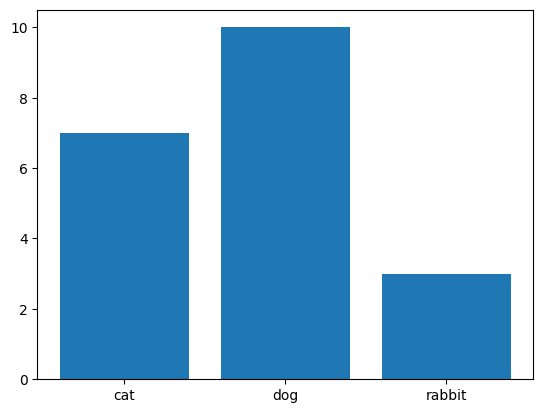

In [5]:
import collections
import matplotlib.pyplot as plt

data = np.random.permutation(np.array(["dog"]*10 + ["cat"]*7 + ["rabbit"]*3))
# print(data)
counts = collections.Counter(data)
plt.bar(range(len(counts)), list(counts.values()), tick_label=list(counts.keys()))

# DON'T DO THIS
# plt.bar(range(len(counts)), counts.values(), tick_label=list(counts.keys()))
# plt.plot(range(len(counts)), counts.values(), 'ko-')

### Pie charts — just say no

Code to use pie-charts:

Pie charts for data presentation, not data exploration!

Here is an example, on how to build pie-chart:

In [ ]:
data = {"strongly disagree": 5,
        "slightly disagree": 3,
        "neutral": 8,
        "slightly agree": 12,
        "strongly agree": 9}

plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%')
plt.axis('equal')

### Histograms — numerical data

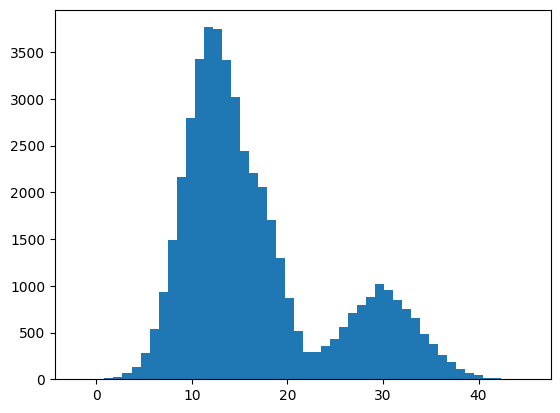

In [10]:
np.random.seed(0)
data = np.concatenate([30 + 4*np.random.randn(10000),
                       18 + 2*np.random.randn(7000),
                       12 + 3*np.random.randn(30000)])
plt.hist(data, bins=50);


# data = np.concatenate([10 + 5*np.random.randn(10000)])
# plt.hist(data, bins=50);

## 2D Data


### Scatter plots — numeric x numeric

If both dimensions of the data are numeric, the most natural first type of plot to consider is the scatter plot: plotting points that simply correspond to the different coordinates of the data.

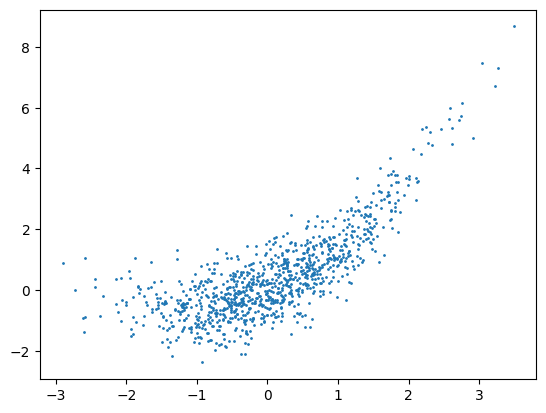

In [15]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
plt.scatter(x,y,s=1)

However, there is also a natural failure mode, where there are too many points to clearly separate, and the plot loses its ability to indicate the density of the data. For example, if we have 10 times as many points, the plot is no longer as clear at indicating the density in the interior of the “density”

In this case of excess data, we can also create a 2D histogram of the data (which bins the data along both dimensions), and indicate the “height” of each block via a color map. Such plots can more clearly indicate the density of points within the regions that are just solid color in the original scatter plot. These 2D histograms are sometimes also called *heatmaps*, but this name often conflicts with similar versions used for plotting 2d categorical data, so we’ll use the term *2D histogram* here.

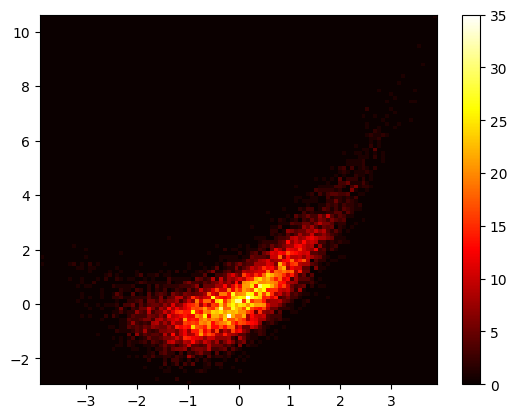

In [16]:
x = np.random.randn(10000)
y = 0.4*x**2 + x + 0.7*np.random.randn(10000)
# plt.scatter(x,y,s=10)

plt.hist2d(x,y,bins=100);
plt.colorbar();
plt.set_cmap('hot')

### Line plots — numeric x numeric (sequential)

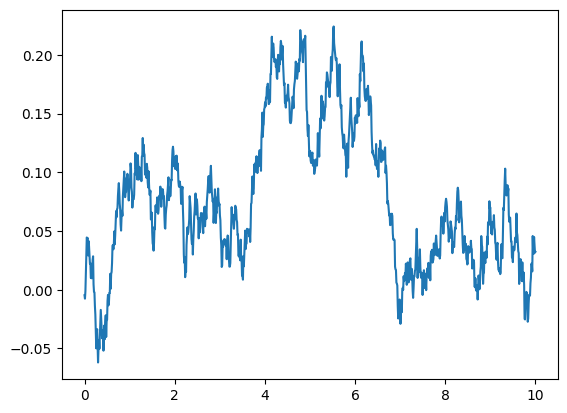

In [17]:
x = np.linspace(0,10,1000)
y = np.cumsum(0.01*np.random.randn(1000))
plt.plot(x,y)

### Box and whiskers and violin plots — categorical x numeric

Let’s consider a simple example, where here (just with fictitious data), we’re plotting pet type versus weight.

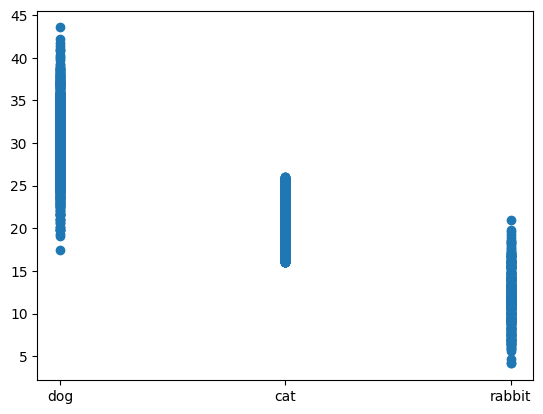

In [23]:
data= {"dog": 30 + 4*np.random.randn(1000),
       "cat": 16 + 10*np.random.rand(700),
       "rabbit": 12 + 3*np.random.randn(300)}
plt.scatter(np.concatenate([i*np.ones(len(x)) for i,x in enumerate(data.values())]),
            np.concatenate(list(data.values())))
plt.xticks(range(len(data)), data.keys());

Obviously very little can be determined by looking at just this plot, as there is not enough information in the dense line of points to really understand the distribution of the numeric variable for each point. A common strategy here is to use a box-and-whiskers plot, which plots the median of the data (as the line in the middle of the box), the 25th and 75th percentiles of the data (as the bottom and top of the box), the “whiskers” are set by a number of different possible conventions (by default Matplotlib uses 1.5 times the interquartile range, the distance between the 25th and 75th percentile), and any points outside this range (“outliers”) plotted individually.

([<matplotlib.axis.XTick at 0x1dd7c5bab90>,
 [Text(1, 0, 'dog'), Text(2, 0, 'cat'), Text(3, 0, 'rabbit')])

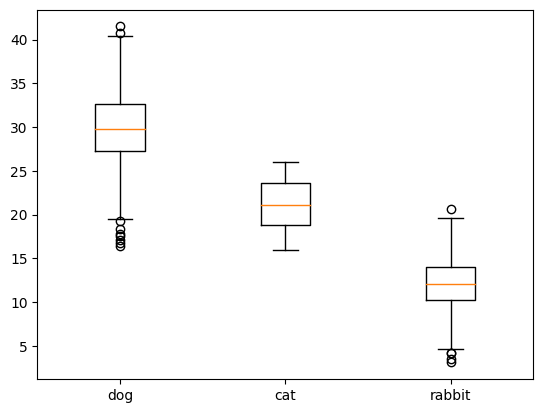

In [19]:
plt.boxplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys())

Of course, just like the means and standard deviations do not fully describe a data set, the box and whisker statistics don’t fully capture the distribution of the data. For this reason, it’s also common to see violin plots, which create mini-histograms

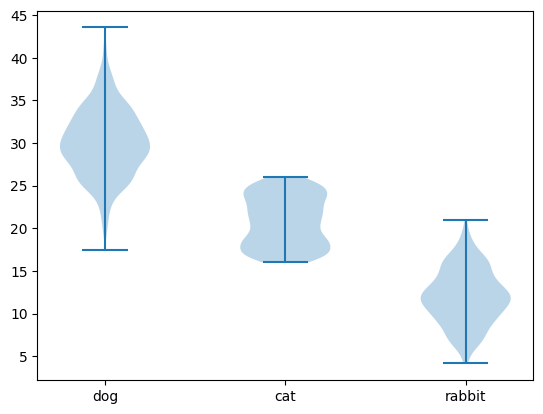

In [24]:
plt.violinplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys())

### Heat map and bubble plots — categorical x categorical

When both dimensions of our 2D data are categorical, we have even less information to use. Again, the goal will be to provide some kind of indication about the total counts of every possible combination between the two data sets. For example, considering a fictitious data set of pet-type vs. house type:

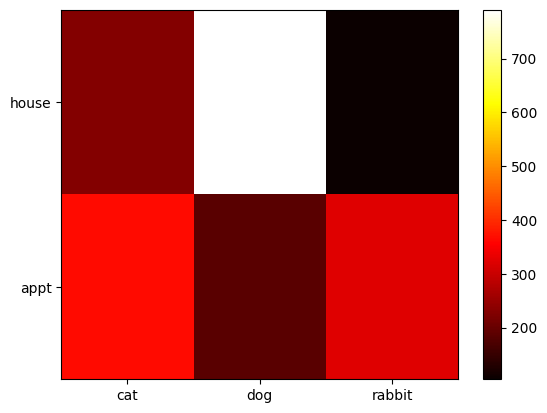

In [26]:
types = np.array([('dog', 'house'), ('dog', 'appt'), 
                  ('cat', 'house'), ('cat', 'appt'), 
                  ('rabbit', 'house'), ('rabbit', 'appt')])
data = types[np.random.choice(range(6), 2000, p=[0.4, 0.1, 0.12, 0.18, 0.05, 0.15]),:]

# print(data[100:])

label_x, x = np.unique(data[:,0], return_inverse=True)
label_y, y = np.unique(data[:,1], return_inverse=True)
M, xt, yt, _ = plt.hist2d(x,y, bins=(len(label_x), len(label_y)))
plt.xticks((xt[:-1]+xt[1:])/2, label_x)
plt.yticks((yt[:-1]+yt[1:])/2, label_y)
plt.colorbar()

Although this can be somewhat useful, the range of colors is admittedly not very informative in some settings, and so a scatter plot with sizes associated with each data type may be more appropriate (this is also called a bubble plot).

([<matplotlib.axis.YTick at 0x1dd7abfee60>,
 [Text(0, 0, 'appt'), Text(0, 1, 'house')])

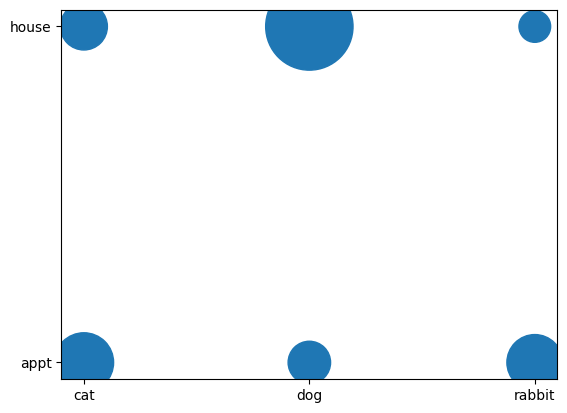

In [27]:
xy, cnts = np.unique((x,y), axis=1, return_counts=True)
plt.scatter(xy[0], xy[1], s=cnts*5)
plt.xticks(range(len(label_x)), label_x)
plt.yticks(range(len(label_y)), label_y)

## 3D+ data

Once we move beyond two dimensions, effective visualization becomes much more difficult. 

### 3D scatter plots

Should be avoided unless 3d plot can be interacted with:

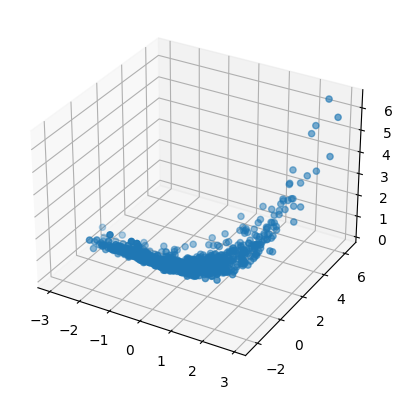

In [28]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
z = 0.5 + 0.2*(y-1)**2 + 0.1*np.random.randn(1000)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

### Scatter matrices

The catch-all for visualizing high dimensional data is the scatter matrix. 

There is one important point to make about scatter matrices: do not try to use these for data presentation.

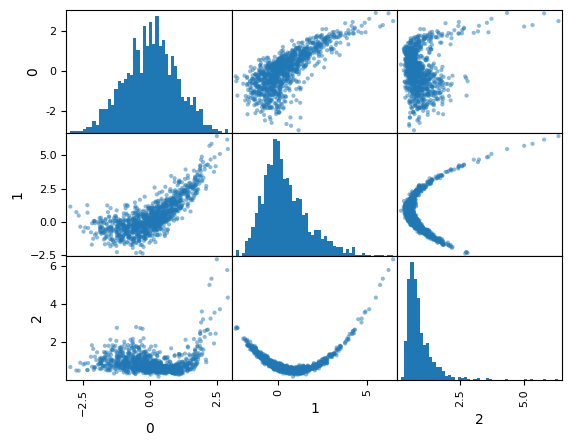

In [29]:
import pandas as pd
df = pd.DataFrame([x,y,z]).transpose()
pd.plotting.scatter_matrix(df, hist_kwds={'bins':50})

### Bubble plots

The bubble plot from the previous section can also be one means of understanding three dimensional data. In this plot and variants, we will build a 2D scatter plot, but annotate a third dimension via some other attribute like the size of the points. For the data above, it would look like the following.

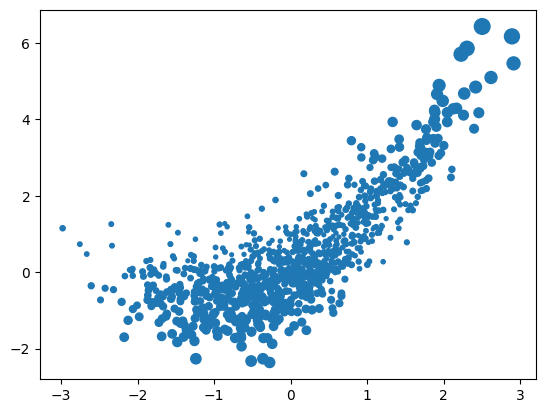

In [30]:
plt.scatter(x,y,s=z*20)

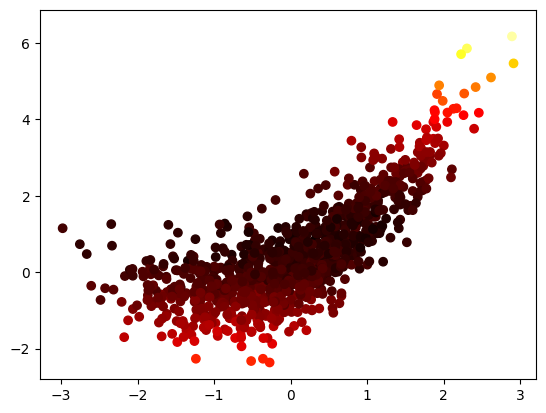

In [31]:
plt.scatter(x,y,c=z)

### Colored scatter plots

One setting where using color to denote a third dimension does work well is when that third dimension is a categorical variable. Assuming there are not too many categories, we can use starkly different colors to denote the third dimension. This is common in figures describing machine learning classification algorithms, for example, because it is useful to visualize the input space to the algorithm as being in 2D, and the class label being a discrete quantity. In fact, we already saw one of these when we wanted to visualize the two different distributions with the same first and second order statistics.

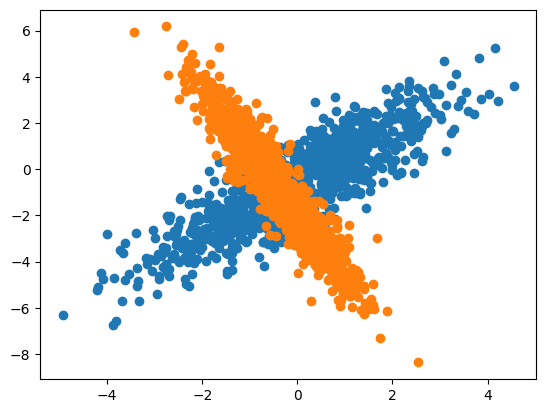

In [32]:
np.random.seed(0)
xy1 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
xy2 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
plt.scatter(xy1[:,0], xy1[:,1])
plt.scatter(xy2[:,0], xy2[:,1])